<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/CNN/Human_Emotion_Detection_by_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Emotion Detection by using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r"/content/drive/MyDrive/Colab/DL/CKPLUS/CK+48"
directory = path

In [ ]:
import os,cv2
import numpy as np


In [ ]:
dir_list=os.listdir(path)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list = os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1


In [ ]:
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(981, 48, 48, 3)

In [ ]:
dir_list

['happy', 'anger', 'sadness', 'disgust', 'contempt', 'surprise', 'fear']

In [ ]:
labels.count(4)

54

In [ ]:
emotions

['happy', 'anger', 'sadness', 'disgust', 'contempt', 'surprise', 'fear']

In [ ]:
len(emotions)

7

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into test , train

num_classes=7  # len(emotions)

Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Augmentaion

data_generator_with_aug = ImageDataGenerator(horizontal_flip = True,
                                              width_shift_range = 0.1,
                                              height_shift_range = 0.1)
data_generator_no_aug = ImageDataGenerator()

train_generator = data_generator_with_aug.flow(X_train,y_train)
validation_generator = data_generator_with_aug.flow(X_test,y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

In [ ]:
# CNN Model to predict the Mood

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_generator,epochs=25, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
    186/Unknown - 208s 1s/step - loss: 1.8645 - accuracy: 0.2333

KeyboardInterrupt: ignored

In [ ]:
# https://www.kaggle.com/akshaythusoo/mood-detector-92-accuracy
# https://github.com/abr-98

In [ ]:
# Plot the Graph to check the how good the model is working

import matplotlib.pyplot as plt


epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
# Creating Confusion Matrix to know the performance of Model

from sklearn.metrics import confusion_matrix


results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

In [ ]:
label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
labels = {0 : 'anger', 1 : 'contempt', 2 : 'disgust', 3 : 'fear', 4 : 'happy',5 :'sadness',6 :'surprise'}

In [ ]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label,
                     columns = label
                    )

In [ ]:
final_cm = cm_df

In [ ]:
import seaborn as sns

plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = model.predict_classes(x)
    pred = model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [ ]:
from keras.utils import np_utils
from sklearn.utils import shuffle

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [ ]:
def create_model():
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')
    
    return model

In [ ]:
model_custom = create_model()
model_custom.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)         

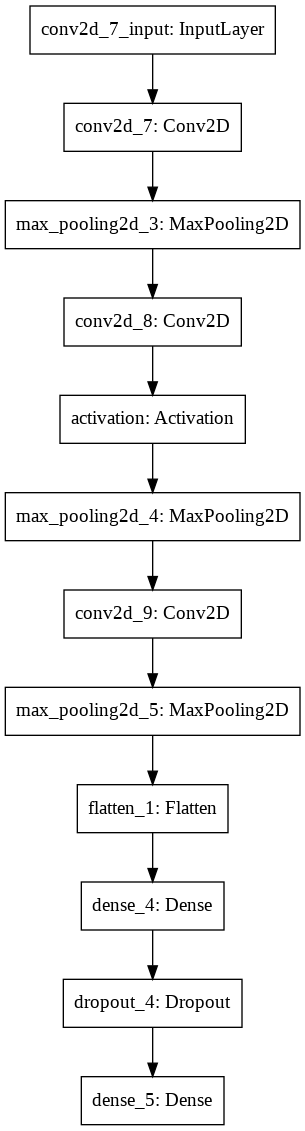

In [ ]:
p = "/content/drive/MyDrive/Colab/DL/CKPLUS/"
from keras.utils.vis_utils import plot_model
plot_model(model_custom, to_file=p+'model.png')

In [ ]:
# Conduct k-Fold Cross-Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
# Training Model
BS = 8
EPOCHS = 200

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

result = []
scores_loss = []
scores_acc = []
k_no = 0
for train_index, test_index in kf.split(x):
    X_Train_ = x[train_index]
    Y_Train = y[train_index]
    X_Test_ = x[test_index]
    Y_Test = y[test_index]

    file_path = "/content/drive/MyDrive/Colab/DL/CKPLUS/weights_best_"+str(k_no)+".hdf5"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    model = create_model()
    hist = model.fit_generator(aug.flow(X_Train_, Y_Train), epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)
    # model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_data=(X_Test, Y_Test), verbose=1)
    model.load_weights(file_path)
    result.append(model.predict(X_Test_))
    score = model.evaluate(X_Test_,Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])
    k_no+=1

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


In [ ]:
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

4


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab/DL/CKPLUS/weights_best_"+str(value_index)+".hdf5")

In [ ]:
best_model = model

In [ ]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(best_model.predict(test_image))
print(best_model.predict_classes(test_image))
print(y_test[0:1])

#predict
y_pred = best_model.predict(X_test)

Test Loss: 0.4486284852027893
Test accuracy: 0.8426395654678345
(1, 48, 48, 3)
[[6.5859735e-01 2.7968293e-01 5.3080551e-02 1.4667786e-04 2.2719330e-03
  8.6600128e-05 6.1339503e-03]]
[0]
[[1. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<Figure size 432x288 with 0 Axes>

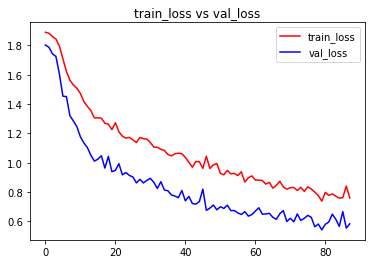

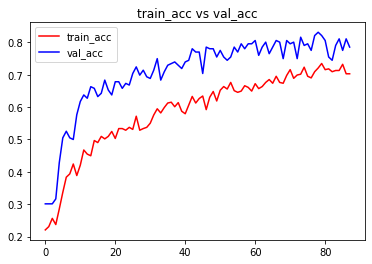

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualizing losses and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
#Model Save
best_model.save_weights('/content/drive/MyDrive/Colab/DL/CKPLUS/model_weights.h5')
best_model.save('/content/drive/MyDrive/Colab/DL/CKPLUS/model_keras.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
results = best_model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import seaborn as sns
import pandas as pd

label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [ ]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

final_cm = cm_df
final_cm

,anger,contempt,disgust,fear,happy,sadness,surprise
anger,24,1,0,0,0,0,0
contempt,9,0,0,0,0,0,0
disgust,5,0,35,4,0,0,0
fear,0,0,2,6,2,0,0
happy,0,0,0,0,36,0,1
sadness,0,0,0,0,0,7,4
surprise,0,0,0,0,1,2,58


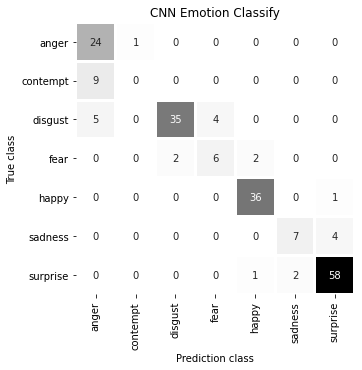

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

new_label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
final_label = new_label
new_class = 7

In [ ]:
#ravel flatten the array into single vector
y_pred_ravel = y_pred.ravel()
lw = 2

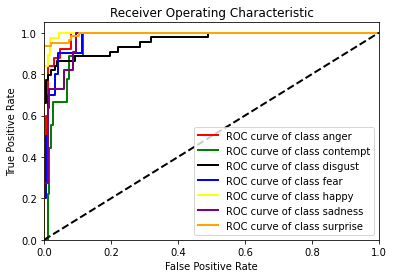

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(new_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#colors = cycle(['red', 'green','black'])
colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange'])
for i, color in zip(range(new_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}'''.format(final_label[i]))
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
labels = {0 : 'anger', 1 : 'contempt', 2 : 'disgust', 3 : 'fear', 4 : 'happy',5 :'sadness',6 :'surprise'}

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual class: contempt
Predicted Class: happy


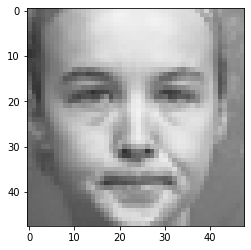

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = best_model.predict_classes(x)
    pred = best_model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual class: anger
Predicted Class: happy


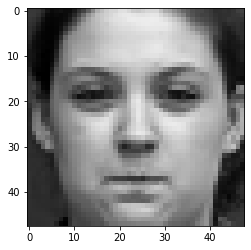

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = best_model.predict_classes(x)
    pred = best_model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual class: happy
Predicted Class: anger


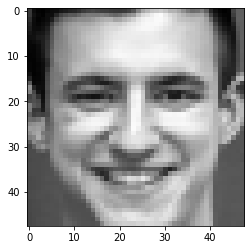

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = best_model.predict_classes(x)
    pred = best_model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual class: contempt
Predicted Class: happy


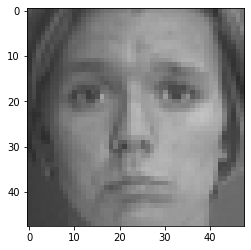

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = best_model.predict_classes(x)
    pred = best_model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual class: contempt
Predicted Class: happy


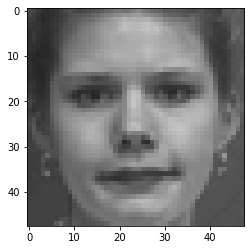

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = best_model.predict_classes(x)
    pred = best_model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Actual class: sadness
Predicted Class: happy


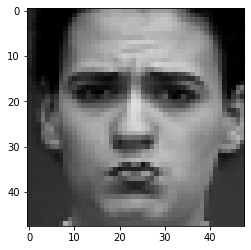

In [ ]:
import random
from glob import glob
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image 
def choose_image_and_predict():
    folder_choice = (random.choice(dir_list))
    images = glob(directory + '/'+ folder_choice+'/*')
    img_choice = (random.choice(images))
    
    img = image.load_img(img_choice, target_size=(48, 48))
    img = image.img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = best_model.predict_classes(x)
    pred = best_model.predict(x)
    label=np.argmax(pred,axis=1)[0]   
    print("Actual class:", folder_choice)
    print("Predicted Class:" , labels[label])
        
choose_image_and_predict()